In [1]:
import pyautogui
from pynput.keyboard import Key, Listener
import numpy as np
from time import sleep
from PIL import Image
#from IPython.display import Image as IPImage
# IPImage(filename='test_1.png')
import matplotlib.pyplot as plt

In [2]:
def take_screenshot(img_name, x_pos, y_pos):
    # Taking the min and the max of the mouse position so that the order of the PCP (Picture Click Position) does not affect the screenshot
    x_init = min(x_pos) 
    x_final = max(x_pos)
    y_init = min(y_pos)
    y_final = max(y_pos)
    pyautogui.screenshot(img_name+'.png', region=(x_init,y_init,np.abs(x_init-x_final),np.abs(y_init-y_final)))

In [3]:
def take_continuous_screenshot(img_name, count, x_pos, y_pos):
    # Taking the min and the max of the mouse position so that the order of the PCP (Picture Click Position) does not affect the screenshot
    x_init = min(x_pos) 
    x_final = max(x_pos)
    y_init = min(y_pos)
    y_final = max(y_pos)
    i=1;
    while i<=count:
        pyautogui.screenshot(img_name + '_' + str(i) +'.png', region=(x_init,y_init,np.abs(x_init-x_final),np.abs(y_init-y_final)))
        print("Saved image: " + img_name + '_' + str(i))
        i=i+1

In [64]:
# Keyboard click position
x_pos = []
y_pos = []
def on_press(key):
    print('{0} pressed'.format(
        key))
    if key == Key.shift:
        x_pos.append(pyautogui.position()[0])
        y_pos.append(pyautogui.position()[1])
    if key == Key.ctrl_l:
        # Stop listener
        x_pos.append(pyautogui.position()[0])
        y_pos.append(pyautogui.position()[1])
        return False
    #if key == Key.alt_l:
    #    return False
        

# Collect events until released
with Listener(
        on_press=on_press) as listener:
    listener.join()

Key.shift pressed
Key.ctrl_l pressed


In [70]:
sleep(5)
take_continuous_screenshot("snake_screenshot", 10, x_pos, y_pos)

Saved test_1
Saved test_2
Saved test_3
Saved test_4
Saved test_5
Saved test_6
Saved test_7
Saved test_8
Saved test_9
Saved test_10


In [4]:
def normalise_img(pixels):
    pixels = pixels.astype('float32')
    pixels = (pixels/pixels.max())*255
    #print('Data Type: %s' % pixels_1.dtype)
    #print('Min: %.2f, Max: %.2f' % (pixels_1.min(), pixels_1.max()))
    return pixels    

In [5]:
def subtract_img(img_a, img_b):
    image_org_a = Image.open(img_a)
    image_org_b = Image.open(img_b)
    pixels_a = np.asarray(image_org_a)    
    pixels_b = np.asarray(image_org_b)
    pixels_a = normalise_img(pixels_a)
    pixels_b = normalise_img(pixels_b)
    pixels_ab = pixels_test =  pixels_a - pixels_b
    pixels_ab[pixels_ab<0]=0
    return Image.fromarray(np.uint8(pixels_test)) 
#pixels_1 = normalise_img(pixels_1)

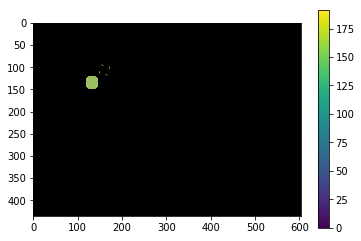

In [8]:
plt.imshow(subtract_img('test_1.png', 'test_2.png'))
plt.colorbar()
plt.show()

In [9]:
for i in range(1,3):
    image_name = 'test_' + str(i)
    image = Image.open(image_name+'.png')
    print("Image 1:")
    print(image.mode)
    print(image.size)
    plt.imshow(image)
    
#plt.show()

Image 1:
RGB
(604, 435)
Image 1:
RGB
(604, 435)


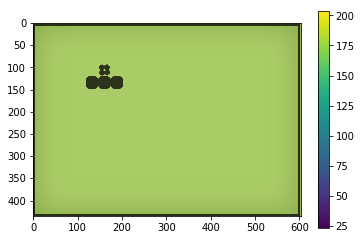

In [240]:
pixels_test = np.asarray(image_test2)
img = Image.fromarray(pixels_test, 'RGB')
pixels = pixels_2.astype('float32')
plt.imshow(img)
plt.colorbar()
plt.show()


In [238]:
pixels_2*255

array([[[101,  70, 166],
        [101,  70, 166],
        [101,  70, 166],
        ..., 
        [101,  70, 166],
        [101,  70, 166],
        [101,  70, 166]],

       [[101,  70, 166],
        [101,  70, 166],
        [101,  70, 166],
        ..., 
        [101,  70, 166],
        [101,  70, 166],
        [101,  70, 166]],

       [[101,  70, 166],
        [217, 209, 233],
        [217, 209, 233],
        ..., 
        [101,  70, 166],
        [101,  70, 166],
        [101,  70, 166]],

       ..., 
       [[101,  70, 166],
        [217, 209, 233],
        [217, 209, 233],
        ..., 
        [101,  70, 166],
        [101,  70, 166],
        [101,  70, 166]],

       [[101,  70, 166],
        [217, 209, 233],
        [217, 209, 233],
        ..., 
        [101,  70, 166],
        [101,  70, 166],
        [101,  70, 166]],

       [[101,  70, 166],
        [101,  70, 166],
        [101,  70, 166],
        ..., 
        [101,  70, 166],
        [101,  70, 166],
        [101,  70,

In [57]:
# Mouse click position
x_pos = []
y_pos = []
def on_click(x, y, button, pressed):
    print('{0} at {1}'.format('Pressed' if pressed else 'Released',(x, y)))
    if pressed:
        x_pos.append(x)
        y_pos.append(y)  
    if not pressed:
        x_pos.append(x)
        y_pos.append(y) 
        if(str(button) == "Button.right"):
            pyautogui.screenshot('my_screenshot.png', region=(np.abs(x_pos[0]-x_pos[1]),np.abs(y_pos[0]-y_pos[1]), 300, 400))        
        return False
    
listener = mouse.Listener(
    on_click=on_click)
listener.start()

Pressed at (428, 330)
Released at (868, 605)


In [11]:
im = pyautogui.screenshot('my_screenshot.png', region=(0,0, 300, 400))

<PIL.Image.Image image mode=RGB size=300x400 at 0x1EC8828D550>


In [55]:
x_pos

[1457, 1153]

In [56]:
np.abs(x_pos[0]-x_pos[1])

304

In [11]:
x = pyautogui.position()
print(x)
print(x[0])
print(x[1])

Point(x=603, y=912)
603
912


In [13]:
pyautogui.position()[0]

614

In [13]:
x_pos

[822, 421]

In [14]:
min(x_pos)

421

In [ ]:
x = np.linspace(-10,10,num=50)
r = 10;
y = (r^2)-(np.square(x))
for i in range(10):
    pyautogui.moveTo(100, 100, duration=0.25)
    pyautogui.moveTo(200, 100, duration=0.25)
    pyautogui.moveTo(200, 200, duration=0.25)
    pyautogui.moveTo(100, 200, duration=0.25)